In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


In [2]:
training = pd.read_csv("../input/train.csv")
testing = pd.read_csv("../input/test.csv")

> ### Let's learn the features of data we have.

In [3]:
training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
testing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
training.shape

(1460, 81)

In [6]:
testing.shape

(1459, 80)

In [7]:
training.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Cleaning Data!
> I am gonna fill the numeric missing values with "median" and replace Other missing values(categorical) with None.

In [8]:
# Lets find missing values!
training_null = pd.isnull(training).sum()
testing_null = pd.isnull(testing).sum()

missing = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])

In [9]:
missing_many = missing[missing.sum(axis=1) > 200]  #a lot of missing values
missing_few = missing[(missing.sum(axis=1) > 0) & (missing.sum(axis=1) < 200)]  #not as much missing values
# So I can analyze missing_many.
missing_many

,Training,Testing
Alley,1369,1352.0
Fence,1179,1169.0
FireplaceQu,690,730.0
LotFrontage,259,227.0
MiscFeature,1406,1408.0
PoolQC,1453,1456.0


In [10]:
missing_few

,Training,Testing
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0
BsmtUnfSF,0,1.0


In [11]:
## Categorical
missing_categorical= ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in missing_categorical:
    training[i].fillna("None", inplace=True)
    testing[i].fillna("None", inplace=True)

In [12]:
training_null = pd.isnull(training).sum()
testing_null = pd.isnull(testing).sum()

missing = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])

In [13]:
missing_many = missing[missing.sum(axis=1) > 200]  #a lot of missing values
missing_few = missing[(missing.sum(axis=1) > 0) & (missing.sum(axis=1) < 200)]  #not as much missing values
# So I can analyze missing_many.
missing_many

,Training,Testing
LotFrontage,259,227.0


> Soo LotFrontage has too many missing values. I am gonna drop that feature.

In [14]:
training.drop("LotFrontage", axis=1, inplace=True)
testing.drop("LotFrontage", axis=1, inplace=True)

In [15]:
missing_few

,Training,Testing
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtUnfSF,0,1.0
Electrical,1,0.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
Functional,0,2.0
GarageArea,0,1.0


In [16]:
## Numeric
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

> GarageYrBlt, MasVnrArea, and MasVnrType all have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None", as we did before. We can fill the others with median.

In [17]:
training["GarageYrBlt"].fillna(training["GarageYrBlt"].median(), inplace=True)
testing["GarageYrBlt"].fillna(testing["GarageYrBlt"].median(), inplace=True)
training["MasVnrArea"].fillna(training["MasVnrArea"].median(), inplace=True)
testing["MasVnrArea"].fillna(testing["MasVnrArea"].median(), inplace=True)
training["MasVnrType"].fillna("None", inplace=True)
testing["MasVnrType"].fillna("None", inplace=True)

In [18]:
#I should convert num_train and num_test to a list to make it easier to work with
num_train = training.dtypes[(training.dtypes == float) | (training.dtypes == int)] #categorical values are type object
num_test = training.dtypes[(training.dtypes == float) | (training.dtypes == int)] #categorical values are type object
numerical_values_train = list(num_train.index)
numerical_values_test = list(num_test.index)
print(numerical_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [19]:
fill_num = []

for i in numerical_values_train:
    if i in list(missing_few.index):
        fill_num.append(i)
print(fill_num)

['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


> **These are the numerical features in the data that have missing values in them. I will impute these features with a for-loop below.**

In [20]:
for i in fill_num:
    training[i].fillna(training[i].median(), inplace=True)
    testing[i].fillna(testing[i].median(), inplace=True)

In [21]:
#I should convert cat_train and cat_test to a list to make it easier to work with
cat_train = training.dtypes[training.dtypes == object] #categorical values are type object
cat_test = training.dtypes[training.dtypes == object] #categorical values are type object
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [22]:
fill_cat = []

for i in categorical_values_train:
    if i in list(missing_few.index):
        fill_cat.append(i)
print(fill_cat)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']


**These are the categorical features in the data that have missing values in them. I'll impute with the most common term below.**

In [23]:
for i in categorical_values_train:
    feature_set = set(training[i])
    for j in feature_set:
        feature_list = list(feature_set)
        training.loc[training[i] == j, i] = feature_list.index(j)

for i in categorical_values_test:
    feature_set2 = set(testing[i])
    for j in feature_set2:
        feature_list2 = list(feature_set2)
        testing.loc[testing[i] == j, i] = feature_list2.index(j)

In [24]:
training.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,8450,0,1,0,3,1,1,2,12,1,1,3,7,7,5,2003,2003,2,0,13,14,2,196.0,3,4,2,2,3,1,3,706,6,0,150,856,0,1,1,4,856,854,0,1710,1,0,2,1,3,1,3,8,1,0,5,6,2003.0,2,2,548,4,4,1,0,61,0,0,0,0,2,1,4,0,2,2008,2,3,208500
1,2,20,1,9600,0,1,0,3,1,4,2,16,6,1,3,2,6,8,1976,1976,2,0,4,5,3,0.0,2,4,0,2,3,2,1,978,6,0,284,1262,0,1,1,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,1,4,6,1976.0,2,2,460,4,4,1,298,0,0,0,0,0,2,1,4,0,5,2007,2,3,181500
2,3,60,1,11250,0,1,2,3,1,1,2,12,1,1,3,7,7,5,2001,2002,2,0,13,14,2,162.0,3,4,2,2,3,0,3,486,6,0,434,920,0,1,1,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,1,4,6,2001.0,2,2,608,4,4,1,0,42,0,0,0,0,2,1,4,0,9,2008,2,3,223500
3,4,70,1,9550,0,1,2,3,1,0,2,9,1,1,3,7,7,5,1915,1970,2,0,5,6,3,0.0,2,4,3,3,2,1,1,216,6,0,540,756,0,3,1,4,961,756,0,1717,1,0,1,0,3,1,3,7,1,1,3,0,1998.0,3,3,642,4,4,1,0,35,272,0,0,0,2,1,4,0,2,2006,2,0,140000
4,5,60,1,14260,0,1,2,3,1,4,2,7,1,1,3,7,8,5,2000,2000,2,0,13,14,2,350.0,3,4,2,2,3,4,3,655,6,0,490,1145,0,1,1,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,1,4,6,2000.0,2,3,836,4,4,1,192,84,0,0,0,0,2,1,4,0,12,2008,2,3,250000


In [25]:
testing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,4,11622,0,1,0,3,1,1,2,14,6,1,3,1,5,6,1961,1961,2,0,12,14,3,0.0,2,4,0,3,3,1,5,468.0,0,144.0,270.0,882.0,0,4,1,1,896,0,0,896,0.0,0.0,1,0,2,1,4,5,2,0,5,5,1961.0,3,1.0,730.0,3,4,1,140,0,0,0,120,0,1,3,2,0,6,2010,3,3
1,1462,20,2,14267,0,1,2,3,1,0,2,14,1,1,3,1,6,6,1958,1958,5,0,6,8,2,108.0,2,4,0,3,3,1,1,923.0,6,0.0,406.0,1329.0,0,4,1,1,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,2,0,5,5,1958.0,3,1.0,312.0,3,4,1,393,36,0,0,0,0,1,4,0,12500,6,2010,3,3
2,1463,60,2,13830,0,1,2,3,1,1,2,13,1,1,3,6,5,5,1997,1998,2,0,12,14,3,0.0,2,4,2,2,3,1,3,791.0,6,0.0,137.0,928.0,0,3,1,1,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,2,1,4,5,1997.0,0,2.0,482.0,3,4,1,212,34,0,0,0,0,1,3,2,0,3,2010,3,3
3,1464,60,2,9978,0,1,2,3,1,1,2,13,1,1,3,6,6,6,1998,1998,2,0,12,14,2,20.0,2,4,2,3,3,1,3,602.0,6,0.0,324.0,926.0,0,1,1,1,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,2,1,3,5,1998.0,0,2.0,470.0,3,4,1,360,36,0,0,0,0,1,4,2,0,6,2010,3,3
4,1465,120,2,5005,0,1,2,2,1,1,2,15,1,1,1,1,8,5,1992,1992,2,0,8,10,3,0.0,3,4,2,2,3,1,1,263.0,6,0.0,1017.0,1280.0,0,1,1,1,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,2,0,5,5,1992.0,2,2.0,506.0,3,4,1,0,82,0,0,144,0,1,4,2,0,1,2010,3,3


> I can build my model right know. Beacuse it seems like I have changed all the categorical strings into a representative number. <

In [26]:
most_common = ["Electrical", "Exterior1st", "Exterior2nd", "Functional", "KitchenQual", "MSZoning", "SaleType", "Utilities", "MasVnrType"]

In [27]:
training[most_common].head()

,Electrical,Exterior1st,Exterior2nd,Functional,KitchenQual,MSZoning,SaleType,Utilities,MasVnrType
0,4,13,14,1,3,1,2,1,2
1,4,4,5,1,2,1,2,1,3
2,4,13,14,1,3,1,2,1,2
3,4,5,6,1,3,1,2,1,3
4,4,13,14,1,3,1,2,1,2


In [28]:
training["MasVnrType"].mean()
#training["Electrical"].mean()
#training["Functional"].mean()

2.489041095890411

In [29]:
training["Electrical"].fillna(1, inplace=True)
training["Exterior1st"].fillna(4, inplace=True)
training["Exterior2nd"].fillna(6, inplace=True)
training["Functional"].fillna(6, inplace=True)
training["KitchenQual"].fillna(2, inplace=True)
training["MSZoning"].fillna(0, inplace=True)
training["SaleType"].fillna(8, inplace=True)
training["Utilities"].fillna(1, inplace=True)
training["MasVnrType"].fillna(2, inplace=True)

In [30]:
testing["Electrical"].fillna(1, inplace=True)
testing["Exterior1st"].fillna(4, inplace=True)
testing["Exterior2nd"].fillna(6, inplace=True)
testing["Functional"].fillna(6, inplace=True)
testing["KitchenQual"].fillna(2, inplace=True)
testing["MSZoning"].fillna(0, inplace=True)
testing["SaleType"].fillna(8, inplace=True)
testing["Utilities"].fillna(1, inplace=True)
testing["MasVnrType"].fillna(2, inplace=True)

In [31]:
training_null = pd.isnull(training).sum()
testing_null = pd.isnull(testing).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null[null.sum(axis=1) > 0]

,Training,Testing


> As you can see, There is no missing values!!! 🎉

### Feature Selection:
>Now that we have dealt with all the missing values. We need to create feature vectors in order to get the data ready to be fed into our model as training data. This requires us to convert the categorical values into representative numbers.

**I want to learn  which columns correlate the most with the Sale Price of the house!**

In [32]:
correlations= training.corr()
correlations = correlations["SalePrice"].sort_values(ascending=False)
correlations

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
GarageType       0.381822
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
SaleCondition    0.290952
HalfBath         0.284108
Exterior1st      0.281056
SaleType         0.275002
ExterQual        0.265015
LotArea          0.263843
Foundation       0.257593
LotShape         0.251832
CentralAir       0.251328
RoofStyle        0.227969
BsmtFullBath     0.227122
                   ...   
LotConfig        0.042646
GarageCond       0.042352
BsmtCond         0.021549
Utilities        0.014314
LandContour     -0.003057
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal     

In [33]:
# According to that list, OverallQual, GrLivArea, GarageCars, GarageArea and TotalBsmtSF are the best corr. 
features = correlations.index[0:6]
features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF'],
      dtype='object')

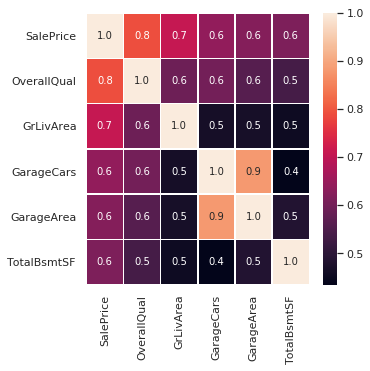

In [34]:
#Correlation map
f,ax= plt.subplots(figsize=(5,5))
sns.heatmap(training.loc[:,features].corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

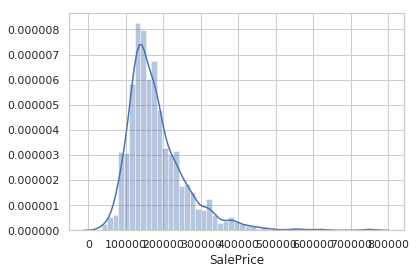

In [35]:
# Let's take a look at our target.
sns.distplot(training["SalePrice"])

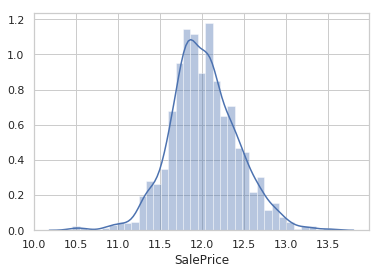

In [36]:
sns.distplot(np.log(training["SalePrice"]))

> Sale Price is very skewed. I think we should transforming the prices, in this way we can boost model performance.

In [37]:
training["TransformedPrice"] = np.log(training["SalePrice"])

### Random Forest Algorithm

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split #to create validation data set

In [39]:
x_train = training.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y_train = training["TransformedPrice"].values
x_test = testing.drop("Id", axis=1).values

In [40]:
X_training, X_valid, y_training, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [41]:
rf = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rf, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("RF Score: " + str(grid_rf.best_score_))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  1.2min finished


Best RandomForestRegressor Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
RF Score: 0.8601135027999225


In [42]:
rf = grid_rf.best_estimator_
rf.fit(X_training, y_training)
rf_pred = rf.predict(X_valid)
r2_rf = r2_score(y_valid, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_valid, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.8675665956379428
RMSE Score: 0.14159942260059805


## Submission 

In [43]:
submission_predictions = np.exp(rf.predict(x_test))

In [44]:
submission = pd.DataFrame({
        "Id": testing["Id"],
        "SalePrice": submission_predictions
    })

submission.to_csv("prices.csv", index=False)
print(submission.shape)

(1459, 2)


In [45]:
submission.head()

,Id,SalePrice
0,1461,121484.762366
1,1462,160865.050861
2,1463,185063.725332
3,1464,187890.838881
4,1465,192677.071971
